In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from fancyimpute import KNN
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv("adult-all.csv")

In [3]:
df1 = pd.DataFrame(np.vstack([df.columns, df]))
df1.columns = ['Age', 'Job-Sector', 'ZipCode', 'Education', 'Experience', 'Marital Status', 'Occupation', 'Family', 'Race', 'Gender', 'Unknown1', 'Unknown2', 'Unknown3', 'Country', 'Salary']
convert_dict = {'Age': int,
                'Job-Sector': object,
                'ZipCode' : int,
                'Education':object, 
                'Experience': int, 
                'Marital Status': object, 
                'Occupation':object, 
                'Family': object, 
                'Race':object, 
                'Gender':object, 
                'Unknown1':int, 
                'Unknown2': int, 
                'Unknown3':int, 
                'Country':object, 
                'Salary':object }  
  
df1 = df1.astype(convert_dict)
df1.head()

,Age,Job-Sector,ZipCode,Education,Experience,Marital Status,Occupation,Family,Race,Gender,Unknown1,Unknown2,Unknown3,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(0.0, 11.0)

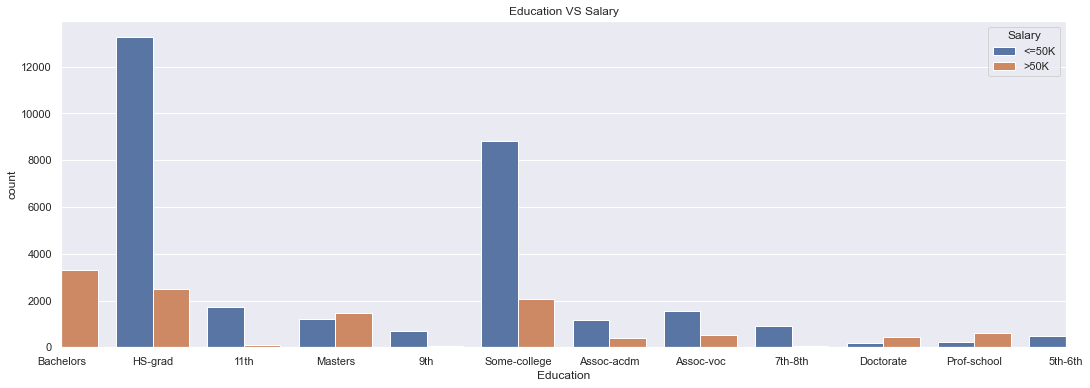

In [4]:
#Education VS Salary
Education_sal=df1[['Education', 'Salary']]
sns.set(rc={"figure.figsize":(18, 6)})
sns.countplot(x='Education', hue='Salary', data=df1).set_title('Education VS Salary')
plt.xlim(0,11)

(0.0, 12.0)

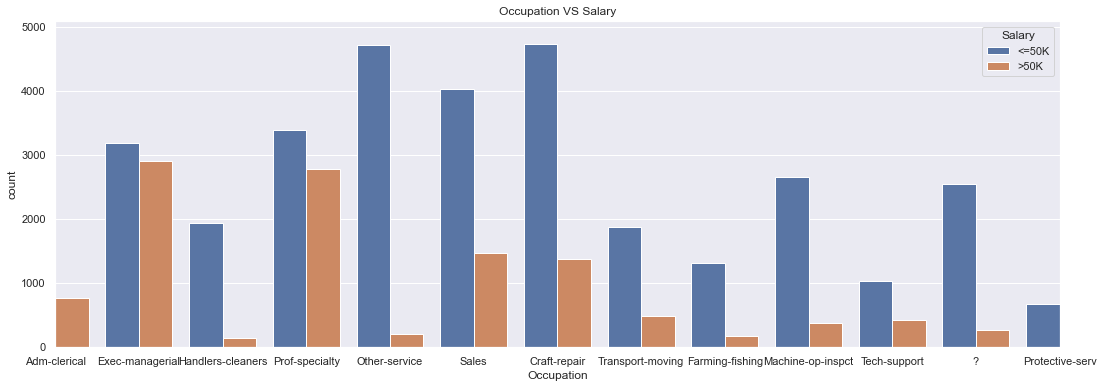

In [5]:
#Occupation vs Salary
Occupation_sal=df1[['Occupation', 'Salary']]
sns.set(rc={"figure.figsize":(18, 6)})
sns.countplot(x='Occupation', hue='Salary', data=df1).set_title('Occupation VS Salary')
plt.xlim(0,12)
#plt.savefig('Occupation vs Salary.png', dpi=1000)

Text(0.5, 1.0, 'Gender VS Salary')

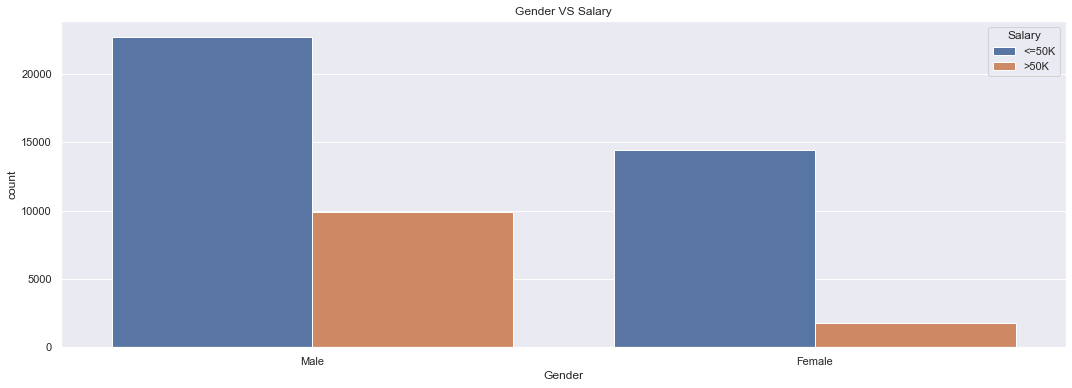

In [6]:
#Gender vs Salary
Gender_sal=df1[['Gender', 'Salary']]
sns.set(rc={"figure.figsize":(18, 6)})
sns.countplot(x='Gender', hue='Salary', data=df1).set_title('Gender VS Salary')

In [7]:
first = df1[['Occupation', 'Education', 'Gender', 'Race', 'Family', 'Marital Status', 'Salary']]
first = first.apply(lambda x: pd.factorize(x)[0])
first['_Experience_'] = df1['Experience']
new_cols = ['Occupation', 'Education', 'Gender', 'Race', 'Family', 'Marital Status', '_Experience_', 'Salary']
first=first[new_cols]
first

,Occupation,Education,Gender,Race,Family,Marital Status,_Experience_,Salary
0,0,0,0,0,0,0,13,0
1,1,0,0,0,1,1,13,0
2,2,1,0,0,0,2,9,0
3,2,2,0,1,1,1,7,0
4,3,0,1,1,2,1,13,0
...,...,...,...,...,...,...,...,...
48837,3,0,1,0,0,2,13,0
48838,11,1,0,1,5,6,9,0
48839,3,0,0,0,1,1,13,0
48840,0,0,0,2,3,2,13,0


In [8]:
# Another representation of correlation
#data = first
#XX = data.iloc[:,:-1]  #independent columns
#yy = data.iloc[:,-1]    #target column i.e Salary
##get correlations of each features in dataset
#corrmat = data.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(15,6))
##plot heat map
##sns.set(font_scale = 3)
#g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='coolwarm', annot_kws={"size": 20})
#plt.savefig('Correlation sns heatmap(1000).png', dpi=1000)

In [9]:
#get correlations of each features in representative dataset
corr = first.corr()
corr.style.background_gradient(cmap='coolwarm')

,Occupation,Education,Gender,Race,Family,Marital Status,_Experience_,Salary
Occupation,1.000000,0.076226,-0.144529,0.012488,-0.007697,0.007300,-0.243140,-0.109354
Education,0.076226,1.000000,-0.002780,0.026466,0.046597,0.012084,-0.284100,-0.048369
Gender,-0.144529,-0.002780,1.000000,0.066100,0.272661,0.176040,-0.009328,-0.214628
Race,0.012488,0.026466,0.066100,1.000000,0.097324,0.011894,-0.037397,-0.063277
Family,-0.007697,0.046597,0.272661,0.097324,1.000000,0.022268,-0.139858,-0.170662
Marital Status,0.007300,0.012084,0.176040,0.011894,0.022268,1.000000,-0.066537,0.002517
_Experience_,-0.243140,-0.284100,-0.009328,-0.037397,-0.139858,-0.066537,1.000000,0.332613
Salary,-0.109354,-0.048369,-0.214628,-0.063277,-0.170662,0.002517,0.332613,1.000000


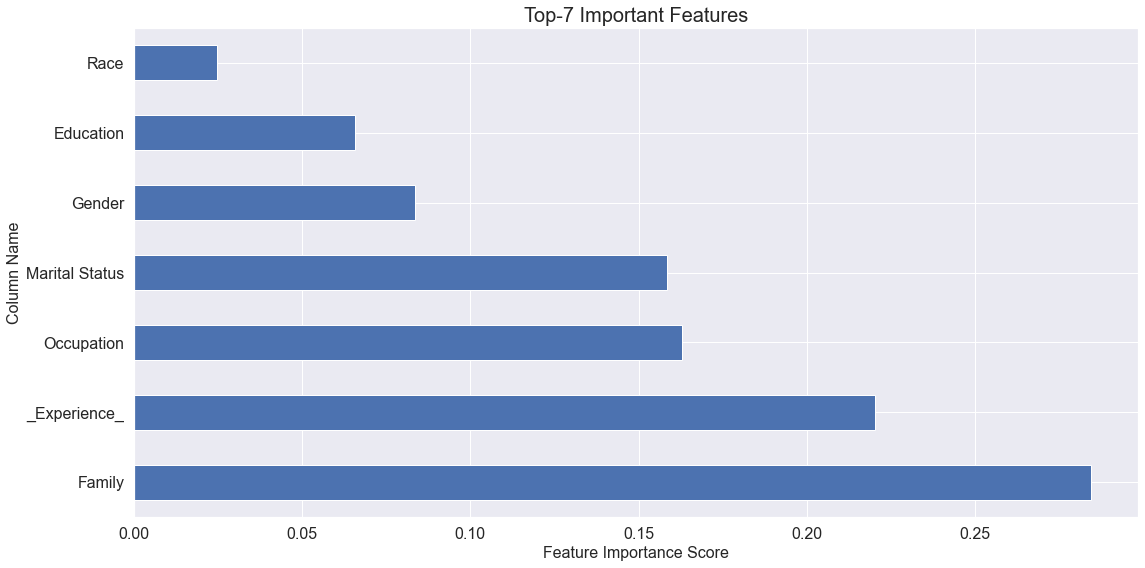

In [10]:
# to show the top 10 important features

#from sklearn.ensemble import ExtraTreesClassifier
target = first['Salary']
model = ExtraTreesClassifier()
feature = first.drop('Salary', axis=1)
model.fit(feature, target)

feat_importances = pd.Series(model.feature_importances_, index=feature.columns)
plt.figure(figsize=(18, 9))
ax = feat_importances.nlargest(10).plot(kind='barh', fontsize=16)
plt.title('Top-7 Important Features', fontsize=20)
ax.set_xlabel('Feature Importance Score',fontsize=16)
ax.set_ylabel('Column Name', fontsize=16)
plt.show()
#plt.savefig('Top 7 Features(800).png', dpi=800) -- in order to save the graphs as png

**This code snippet shows a complete data analysis in an HTML format

#import sweetviz as sv

#report = sv.analyze(source = first, target_feat = 'Salary', pairwise_analysis = 'on')

#report.show_html('dataframe_analysis.html')

In [14]:
X = first.iloc[:,:-1].values
y=first.iloc[:,7].values
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
#from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#y_pred
#from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("0 means Salary less than or equal to $50k, and 1 means Salary greater than $50k")
print("\n\n Confusion Matrix \n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9249
           1       0.70      0.49      0.58      2962

    accuracy                           0.83     12211
   macro avg       0.78      0.71      0.73     12211
weighted avg       0.81      0.83      0.81     12211

0 means Salary less than or equal to $50k, and 1 means Salary greater than $50k


 Confusion Matrix 
 [[8624  625]
 [1507 1455]]


Optimum K value is:  30


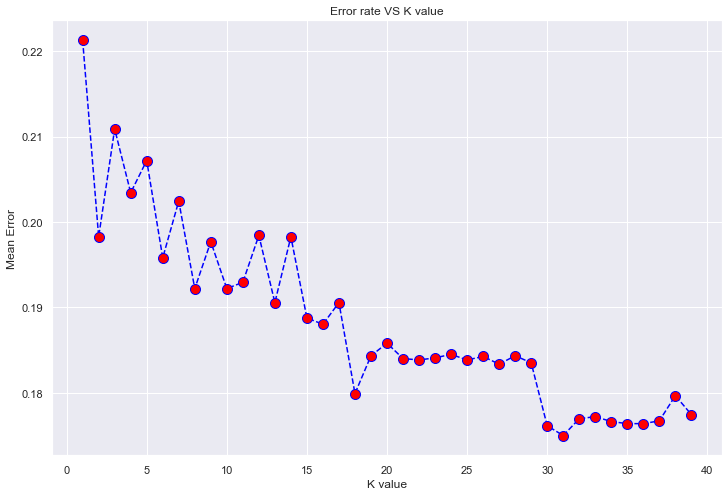

In [13]:
#Elbow method, to visualize and find optimum k values to improve accuracy
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error rate VS K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
plt.savefig('Error Rate VS Value.png', dpi=1000)

#to find out at which value of k the mean error is minimum
print("Optimum K value is: ", error.index(min(error)))